<a href="https://colab.research.google.com/github/AhmedWael2000/MNIST_Classification/blob/main/MNIST_Classification_%26_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading mnist from Keras

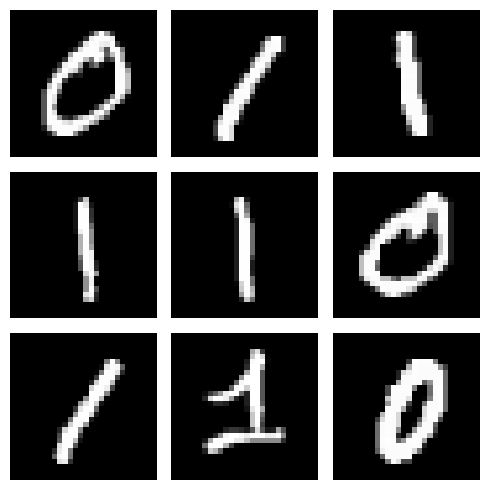

In [21]:
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train=x_train[np.where(y_train<2 )]
x_test=x_test[np.where(y_test<2 )]

y_train=y_train[np.where(y_train<2 )]
y_test=y_test[np.where(y_test <2)]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    # ax.set_title(f'Label: {train_labels[indexes[i]]}')
    ax.axis('off')
plt.tight_layout()



#flatten the training data

In [22]:

x_train=x_train.reshape(12665,-1)
print('x_train shape:', x_train.shape)


x_train shape: (12665, 784)


#normalizing training data

In [23]:
# x_train=x_train/255.0
mean=np.mean(x_train,axis=0)
std=np.std(x_train,axis=0)+1e-5
x_train=(x_train - mean)/std


#Sigmoid Function and cross entropy fuction


In [24]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigCost(y,y_hat):
  y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)
  return np.mean( - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

#logistic function

In [25]:
def logistic(X, y, w, b, l, iter):

  y=y.reshape(-1,1)
  cost=[]
  for j in range(iter):
    # print some stats during training

    z = np.dot(X,w.T)+b
    alphaZ=sigmoid(z)
    cost.append(sigCost(y,alphaZ))

    w += l*np.dot((y - alphaZ).T, X)/len(X)
    b += l*np.sum((y - alphaZ))/len(X)

    # if j %(iter/10)==0:
    #   print(f"iter: {j} b:{b} cost:{cost[-1]}")

  return w, b,cost

#accuracy

In [26]:
def accuracy(y,y_hat):
  y_hat=np.round(y_hat).flatten()
  y=np.round(y).flatten()

  return (y==y_hat).sum()/y.size



#implementing KFold cross Validation

In [27]:
import random as rd
def kfold(x_train,y_train,shuffle=True,k=10):
  indx=list(range(len(x_train)))
  if shuffle:
    rd.shuffle(indx)
  folds=np.array_split(indx,k)  
  pairs=[]
  for i in range(k):
    train=folds[i]
    val=np.concatenate(np.delete(folds,i,axis=0))
    pairs.append((train,val))
  return pairs

pairs=kfold(x_train,y_train,shuffle=True,k=10)   
pairs[0][0].shape,pairs[0][1].shape

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



((1267,), (11398,))

#When Learning rate is 0.01

In [28]:
w = np.random.randn(1, 28*28)
b = np.zeros(1)


In [29]:
train_acc=[]
val_acc_1=[]
for train, val in pairs:
  w, b,cost = logistic(x_train[train], y_train[train], w, b, l=0.01, iter=100)
    
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  val_acc_1.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(val_acc_1)/len(val_acc_1)


('average train accuracy: ',
 0.9514501671423459,
 'average validation accuracy: ',
 0.950009942597853)

#When Learning rate is 0.05

In [30]:
w = np.random.randn(1, 28*28)
b = np.zeros(1)


In [31]:
train_acc=[]
val_acc_2=[]
for train, val in pairs:
    
  w, b,cost = logistic(x_train[train], y_train[train], w, b, l=0.05, iter=100)
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  val_acc_2.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(val_acc_2)/len(val_acc_2)


('average train accuracy: ',
 0.9858687723734463,
 'average validation accuracy: ',
 0.9849626481428224)

#When Learning rate is 0.3

In [32]:
w = np.random.randn(1, 28*28)
b = np.zeros(1)


In [33]:
train_acc=[]
val_acc_3=[]
for train, val in pairs:
  w, b,cost = logistic(x_train[train], y_train[train], w, b, l=0.1, iter=100)
    
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  val_acc_3.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(val_acc_3)/len(val_acc_3)


('average train accuracy: ',
 0.9941579354896628,
 'average validation accuracy: ',
 0.9902880153089221)

#When Learning rate is 0.0001

In [34]:
w = np.random.randn(1, 28*28)
b = np.zeros(1)


In [35]:
train_acc=[]
val_acc_4=[]
for train, val in pairs:
    
  w, b,cost = logistic(x_train[train], y_train[train], w, b, l=0.0001, iter=100)
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  val_acc_4.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(val_acc_4)/len(val_acc_4)


('average train accuracy: ',
 0.30384365052349654,
 'average validation accuracy: ',
 0.30612664218920893)

#Comparing Validation Accuracy for each Case

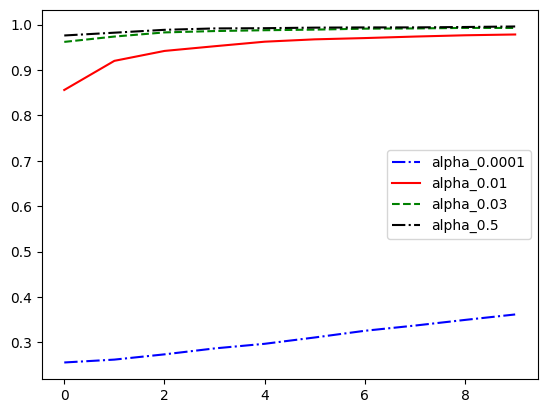

In [36]:
# create sample data
x = np.linspace(0,9,10)
y1 = val_acc_1
y2 = val_acc_2
y3 = val_acc_3
y4=val_acc_4
# plot the data
plt.plot(x, y4, color='blue', linestyle='-.', label='alpha_0.0001')
plt.plot(x, y1, color='red', linestyle='-', label='alpha_0.01')
plt.plot(x, y2, color='green', linestyle='--', label='alpha_0.03')
plt.plot(x, y3, color='black', linestyle='-.', label='alpha_0.5')

plt.legend()

#Visualizing using Plotly library

In [ ]:
lists={
    'alpha_0.0001':y4,
    'alpha_0.01':y1,
    'alpha_0.03':y2,
    'alpha_0.5':y3,
    'x':x
      }
data=pd.DataFrame(lists)
df = pd.melt(data, id_vars=['x'], var_name='line', value_name='y')
df

In [38]:
import plotly.express as px
fig = px.line(df, x='x', y='y', color='line',markers=True)
fig.show()
